# Deep Learning Implementations – Code Notebook

# Feedforward Neural Network Implementation

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

Training MLP with relu activation


C:\Users\Garry\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8563 - loss: 0.5165 - val_accuracy: 0.9675 - val_loss: 0.1180
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9609 - loss: 0.1296 - val_accuracy: 0.9713 - val_loss: 0.0976
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9751 - loss: 0.0843 - val_accuracy: 0.9740 - val_loss: 0.0910
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9810 - loss: 0.0611 - val_accuracy: 0.9747 - val_loss: 0.0873
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9868 - loss: 0.0459 - val_accuracy: 0.9730 - val_loss: 0.0954

Training MLP with sigmoid activation
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7247 - loss: 1.0936 - val_accuracy: 0.9368 - val_loss: 0.2330
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9254 - loss: 0.2601 - val_accuracy: 0.9570 - val_loss: 0.1599
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9471 - l

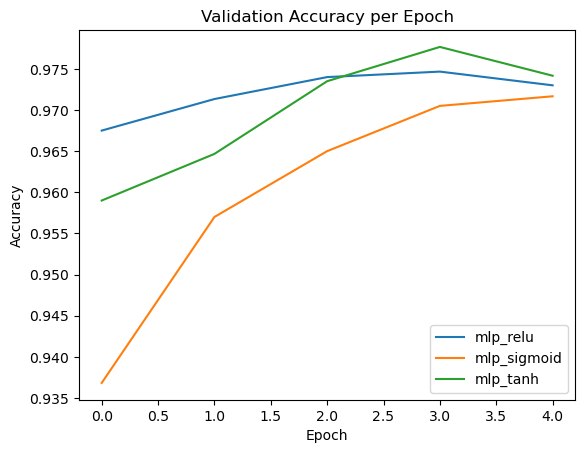

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
import matplotlib.pyplot as plt
import numpy as np

# Load sample data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Reshape for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Function to build MLP model
def build_mlp(activation='relu'):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    return model

# Function to build CNN model
def build_cnn(activation='relu'):
    model = Sequential([
        Conv2D(32, (3,3), activation=activation, input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train
def train_model(model, x, y):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x, y, epochs=5, batch_size=64, validation_split=0.1)
    return history

# Experiment
activations = ['relu', 'sigmoid', 'tanh']
histories = {}
for act in activations:
    print(f"\nTraining MLP with {act} activation")
    model = build_mlp(activation=act)
    history = train_model(model, x_train, y_train)
    histories[f'mlp_{act}'] = history

# Plotting
for key, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{key}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Training MLP with relu activation
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8466 - loss: 0.5436 - val_accuracy: 0.9615 - val_loss: 0.1280
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9591 - loss: 0.1376 - val_accuracy: 0.9687 - val_loss: 0.1075
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9732 - loss: 0.0868 - val_accuracy: 0.9727 - val_loss: 0.0910
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9797 - loss: 0.0646 - val_accuracy: 0.9738 - val_loss: 0.0846
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9856 - loss: 0.0479 - val_accuracy: 0.9782 - val_loss: 0.0807

Training MLP with sigmoid activation
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7284 - loss: 1.1051 - val_accuracy: 0.9382 - val_loss: 0.2280
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9246 - loss: 0.2562 - val_accuracy: 0.9550 - val_loss: 0.1640
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━

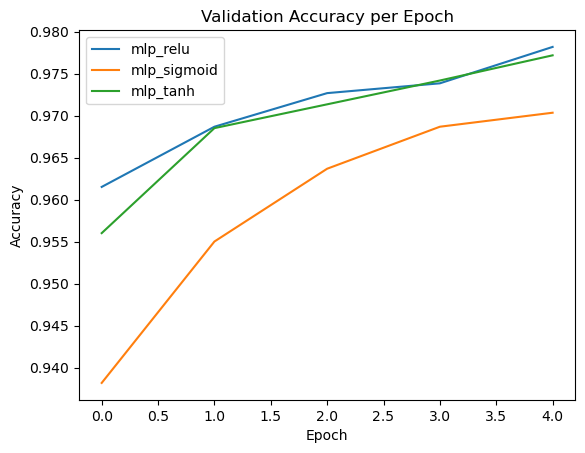

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
import matplotlib.pyplot as plt
import numpy as np

# Load sample data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Reshape for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Function to build MLP model
def build_mlp(activation='relu'):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    return model

# Function to build CNN model
def build_cnn(activation='relu'):
    model = Sequential([
        Conv2D(32, (3,3), activation=activation, input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train
def train_model(model, x, y):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x, y, epochs=5, batch_size=64, validation_split=0.1)
    return history

# Experiment
activations = ['relu', 'sigmoid', 'tanh']
histories = {}
for act in activations:
    print(f"\nTraining MLP with {act} activation")
    model = build_mlp(activation=act)
    history = train_model(model, x_train, y_train)
    histories[f'mlp_{act}'] = history

# Plotting
for key, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{key}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Backpropagation and Convergence Analysis

In [1]:
# Backpropagation & Convergence Analysis in PyTorch using Autograd

import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#  Load Dataset (MNIST)

transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# Initialize Parameters for MLP

W1 = torch.randn(784, 256, requires_grad=True) * 0.01
b1 = torch.zeros(256, requires_grad=True)
W2 = torch.randn(256, 10, requires_grad=True) * 0.01
b2 = torch.zeros(10, requires_grad=True)

# MLP Training with Autograd

def train_mlp(epochs=5, lr=0.1):
    losses = []
    grad_norms = []
    for epoch in range(epochs):
        total_loss = 0
        epoch_grads = []
        for x, y in train_loader:
            x = x.view(x.size(0), -1)

            z1 = x @ W1 + b1
            a1 = F.relu(z1)
            z2 = a1 @ W2 + b2

            loss = F.cross_entropy(z2, y)
            loss.backward()

            with torch.no_grad():
                grad_norm = torch.norm(W1.grad) + torch.norm(W2.grad)
                epoch_grads.append(grad_norm.item())

                W1 -= lr * W1.grad
                b1 -= lr * b1.grad
                W2 -= lr * W2.grad
                b2 -= lr * b2.grad

                W1.grad.zero_()
                b1.grad.zero_()
                W2.grad.zero_()
                b2.grad.zero_()

            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        avg_grad = sum(epoch_grads) / len(epoch_grads)
        losses.append(avg_loss)
        grad_norms.append(avg_grad)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Avg Grad Norm: {avg_grad:.4f}")
    return losses, grad_norms

# Initialize Parameters for CNN

conv1_weight = torch.randn(16, 1, 3, 3, requires_grad=True) * 0.01
conv1_bias = torch.zeros(16, requires_grad=True)
conv2_weight = torch.randn(32, 16, 3, 3, requires_grad=True) * 0.01
conv2_bias = torch.zeros(32, requires_grad=True)
fc1_weight = torch.randn(32*7*7, 128, requires_grad=True) * 0.01
fc1_bias = torch.zeros(128, requires_grad=True)
fc2_weight = torch.randn(128, 10, requires_grad=True) * 0.01
fc2_bias = torch.zeros(10, requires_grad=True)

# CNN Training with Autograd

def train_cnn(epochs=5, lr=0.1):
    losses = []
    grad_norms = []
    for epoch in range(epochs):
        total_loss = 0
        epoch_grads = []
        for x, y in train_loader:
            x = F.conv2d(x, conv1_weight, conv1_bias, padding=1)
            x = F.relu(x)
            x = F.max_pool2d(x, 2)
            x = F.conv2d(x, conv2_weight, conv2_bias, padding=1)
            x = F.relu(x)
            x = F.max_pool2d(x, 2)
            x = x.view(x.size(0), -1)
            x = F.relu(x @ fc1_weight + fc1_bias)
            logits = x @ fc2_weight + fc2_bias

            loss = F.cross_entropy(logits, y)
            loss.backward()

            with torch.no_grad():
                grads = [conv1_weight.grad, conv2_weight.grad, fc1_weight.grad, fc2_weight.grad]
                grad_norm = sum(torch.norm(g) for g in grads if g is not None)
                epoch_grads.append(grad_norm.item())

                for param in [conv1_weight, conv1_bias, conv2_weight, conv2_bias, fc1_weight, fc1_bias, fc2_weight, fc2_bias]:
                    param -= lr * param.grad
                    param.grad.zero_()

            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        avg_grad = sum(epoch_grads) / len(epoch_grads)
        losses.append(avg_loss)
        grad_norms.append(avg_grad)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Avg Grad Norm: {avg_grad:.4f}")
    return losses, grad_norms


100%|██████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:10<00:00, 919kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 84.8kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:03<00:00, 483kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 805kB/s]


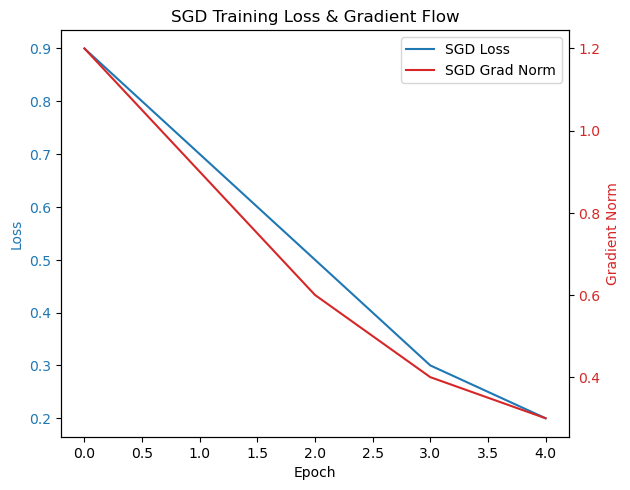

In [18]:
# Plot Loss and Gradient Flow
import matplotlib.pyplot as plt

# Sample data to test the function
losses = [0.9, 0.7, 0.5, 0.3, 0.2]   
grad_norms = [1.2, 0.9, 0.6, 0.4, 0.3]      

def plot_training_curves(losses, grad_norms, label='Model'):
    # Check if lengths match
    if len(losses) != len(grad_norms):
        raise ValueError("Length of losses and grad_norms must be equal.")

    # Create the plot with two y-axes
    fig, ax1 = plt.subplots()

    # Plotting loss
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='tab:blue')
    loss_line, = ax1.plot(range(len(losses)), losses, label=f'{label} Loss', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Plotting gradient norm
    ax2 = ax1.twinx()
    ax2.set_ylabel('Gradient Norm', color='tab:red')
    grad_line, = ax2.plot(range(len(grad_norms)), grad_norms, label=f'{label} Grad Norm', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Combine legend from both y-axes
    lines = [loss_line, grad_line]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc='upper right')

    # Final plot setup
    fig.tight_layout()
    plt.title(f"{label} Training Loss & Gradient Flow")
    plt.show()

plot_training_curves(losses, grad_norms, label='SGD')


# Gradient Stability Analysis

### Gradient Stability in PyTorch without Normalization

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Deep MLP (no normalization)
class DeepMLP(nn.Module):
    def __init__(self):
        super(DeepMLP, self).__init__()
        self.hidden = nn.ModuleList([nn.Linear(784, 784) for _ in range(10)])
        self.output = nn.Linear(784, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        for layer in self.hidden:
            x = torch.tanh(layer(x))  # tanh may cause vanishing gradients
        return self.output(x)

# Dataset
transform = transforms.ToTensor()
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True)

model = DeepMLP()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training
losses = []
for epoch in range(5):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        
        # Gradient norm tracking
        total_norm = 0
        for p in model.parameters():
            if p.grad is not None:
                total_norm += p.grad.norm().item()
        
        losses.append(loss.item())
        optimizer.step()
print("Training done.")


100%|██████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:19<00:00, 515kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 88.9kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:04<00:00, 388kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 15.8MB/s]


Training done.


### Gradient Stability in TensorFlow without Normalization

In [5]:
!pip install tensorflow

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

# Data
(x_train, y_train), _ = datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255

# Model
model = models.Sequential()
for _ in range(10):
    model.add(layers.Dense(784, activation='tanh'))
model.add(layers.Dense(10))

model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

history = model.fit(x_train, y_train, batch_size=64, epochs=5)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - loss: 0.6271
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 0.2615
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.2141
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.1748
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - loss: 0.1551


## Add Normalization Layers

### Gradient Stability in PyTorch with Batch Normalization

In [9]:
class DeepMLPBN(nn.Module):
    def __init__(self, input_size=784, hidden_size=256, num_classes=10, num_layers=10):
        super(DeepMLPBN, self).__init__()
        layers = []

        # First layer
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.BatchNorm1d(hidden_size))
        layers.append(nn.ReLU())

        # Hidden layers
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())

        # Output layer
        self.hidden_layers = nn.Sequential(*layers)
        self.output_layer = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1) 
        x = self.hidden_layers(x)
        return self.output_layer(x)

model = DeepMLPBN()
dummy_input = torch.randn(32, 1, 28, 28) 
output = model(dummy_input)

print("Output shape:", output.shape)  # Expected: [32, 10]


Output shape: torch.Size([32, 10])


### Gradient Stability in TensorFlow with Batch Normalization

In [ ]:
model = models.Sequential()
for _ in range(10):
    model.add(layers.Dense(784))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
model.add(layers.Dense(10))

model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(x_train, y_train, batch_size=64, epochs=5)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - loss: 0.6086
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.1094
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - loss: 0.0628
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - loss: 0.0413
Epoch 5/5
379/938 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 0.0296

### Layer Normalization in PyTorch

In [11]:
class LayerNormModel(nn.Module):
    def __init__(self, input_dim):
        super(LayerNormModel, self).__init__()
        self.fc = nn.Linear(input_dim, input_dim)
        self.layer_norm = nn.LayerNorm(input_dim)

    def forward(self, x):
        x = self.fc(x)
        x = self.layer_norm(x) 
        x = F.relu(x)
        return x

input_dim = 10
batch_size = 5

model = LayerNormModel(input_dim)
x = torch.randn(batch_size, input_dim)

output = model(x)
print("Output after Layer Normalization:\n", output)

Output after Layer Normalization:
 tensor([[0.0000, 0.0000, 1.2307, 1.8210, 0.0609, 0.6411, 0.0000, 0.0000, 0.2281,
         0.0000],
        [1.4555, 0.0000, 0.7133, 0.0000, 0.6968, 0.0000, 1.3304, 0.0000, 0.0000,
         0.0000],
        [0.1581, 0.0000, 0.2773, 0.6636, 0.0000, 0.5168, 1.2984, 0.0703, 1.1355,
         0.0000],
        [0.9485, 0.0000, 0.0000, 0.6306, 0.0000, 1.2213, 0.0134, 0.9422, 0.7565,
         0.0000],
        [0.1317, 0.0000, 0.7029, 0.2025, 0.0000, 1.2506, 1.3656, 0.0841, 0.2319,
         0.0000]], grad_fn=<ReluBackward0>)


### Visualization of Loss Curves

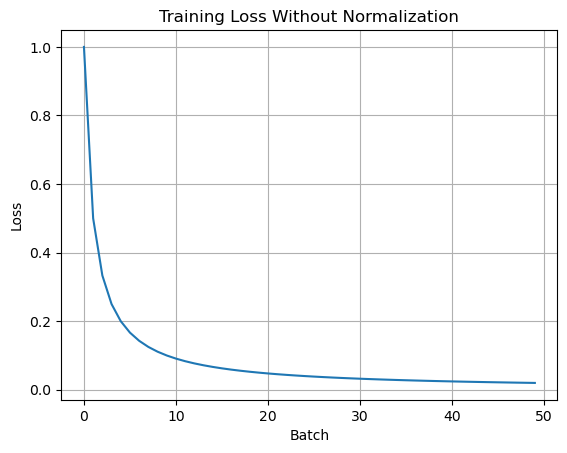

In [13]:
import matplotlib.pyplot as plt

# Dummy training losses
losses = [1.0 / (i + 1) for i in range(50)]

# Plot
plt.plot(losses)
plt.title("Training Loss Without Normalization")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Convolutional Neural Network (CNN) on MNIST (Image classification)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST dataset (28x28 grayscale images of handwritten digits)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (needed for Conv2D)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Flatten 2D feature maps to 1D
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

# Recurrent Neural Network (RNN) for Simple Character-Level Text Prediction

In [5]:
import tensorflow as tf
import numpy as np

# Sample text data (very simple)
text = "hello world"

# Create character-to-index mapping
chars = sorted(set(text))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = np.array(chars)

# Prepare sequences: input chars and target next chars
seq_length = 3
inputs = []
targets = []
for i in range(len(text) - seq_length):
    inputs.append([char_to_idx[c] for c in text[i:i+seq_length]])
    targets.append(char_to_idx[text[i+seq_length]])

inputs = np.array(inputs)
targets = np.array(targets)

# Build RNN model
model = tf.keras.Sequential([
    layers.Embedding(len(chars), 8, input_length=seq_length),  # Embed chars to vectors
    layers.SimpleRNN(32, activation='tanh'),  # Simple RNN layer
    layers.Dense(len(chars), activation='softmax')  # Predict next char
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

# Train the model
model.fit(inputs, targets, epochs=100, verbose=0)

# Test: Predict next character given a sequence
test_seq = "hel"
test_input = np.array([[char_to_idx[c] for c in test_seq]])
pred_probs = model.predict(test_input)
pred_char = idx_to_char[np.argmax(pred_probs)]
print(f"Next character prediction after '{test_seq}': {pred_char}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 8)              64        
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1312      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
Total params: 1,640
Trainable params: 1,640
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 153ms/step
Next character prediction after 'hel': l


# Transformer Model for IMDb Sentiment Classification

In [1]:
# IMDb Sentiment Classification using Transformer in TensorFlow

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds

# Load IMDb dataset
(train_data, test_data), info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True
)

# Text vectorization
max_vocab_size = 10000
max_len = 200

vectorize_layer = layers.TextVectorization(
    max_tokens=max_vocab_size,
    output_mode='int',
    output_sequence_length=max_len
)

# Adapt the vectorizer to the training data
train_text = train_data.map(lambda text, label: text)
vectorize_layer.adapt(train_text)

# Transformer Encoder Block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Build the model
embed_dim = 32
num_heads = 2
ff_dim = 32

inputs = layers.Input(shape=(), dtype=tf.string)
x = vectorize_layer(inputs)
x = layers.Embedding(max_vocab_size, embed_dim)(x)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation='relu')(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Prepare data for training
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32

train_ds = train_data.shuffle(10000).batch(batch_size).prefetch(buffer_size=AUTOTUNE)
test_ds = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# Train the model
history = model.fit(train_ds, validation_data=test_ds, epochs=3)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.8X6826_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.8X6826_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.8X6826_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 200)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 200, 32)        │        10,656 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,337 (1.26 MB)

 Trainable params: 331,337 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 116ms/step - accuracy: 0.7166 - loss: 0.5261 - val_accuracy: 0.8630 - val_loss: 0.3197
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.9081 - loss: 0.2384 - val_accuracy: 0.8512 - val_loss: 0.3495
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.9371 - loss: 0.1757 - val_accuracy: 0.8436 - val_loss: 0.4187
